<img src="./media/doge_gif.gif" width=500></img>

# Data visualization principles

---


Shachee Swadia, <em> The 5 Most Important Principles of Data Visualization </em>

🔵 [https://towardsdatascience.com/the-5-most-important-principles-of-data-visualization-455225a6c4b3]

<h3 style="text-align: center;"> 1) Tell the truth </h3>

<img src="./media/1.png" width=500></img>

<h3 style="text-align: center;"> 2) Know your audience </h3>

<img src="./media/2.png" width=500></img>

<h3 style="text-align: center;"> 3) Choose the right chart </h3>

<img src="./media/3.png" width=500></img>

<h3 style="text-align: center;"> 4) Emphasize the important </h3>

<img src="./media/4.png" width=500></img>

<h3 style="text-align: center;"> 5) Form should follow function </h3>

<img src="./media/5.png" width=500></img>

# Imports

---

In [1]:
import numpy as np  # ................. conda install numpy
import pandas as pd  # ................ conda install pandas

import seaborn as sns  # .............. conda install seaborn
import matplotlib.pyplot as plt

import plotly.express as px  # ........ conda install plotly 
import plotly.graph_objects as go

from celluloid import Camera  # ....... conda install celluloid
from IPython.display import HTML


plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (13, 7)})

# Basic plots with `matplotlib`
---


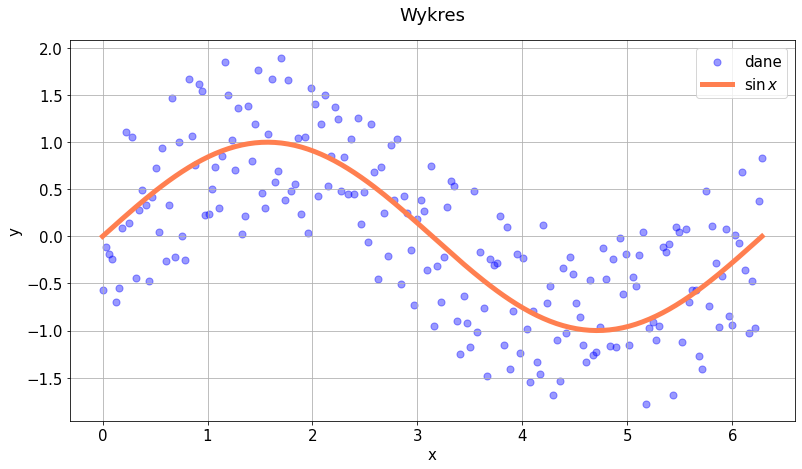

In [2]:
xs = np.linspace(0, 2*np.pi, 200)
ys = np.sin(xs) + np.random.uniform(-1, 1, size=200)

plt.scatter(xs, ys, color="blue", alpha=0.4, s=50, marker="o", label="dane")
plt.plot(xs, np.sin(xs), color="coral", lw=5, label="$\sin{x}$")
plt.title("Wykres", pad=20)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.savefig("plot.pdf")

# Object-oriented plotting with `matplotlib`
---

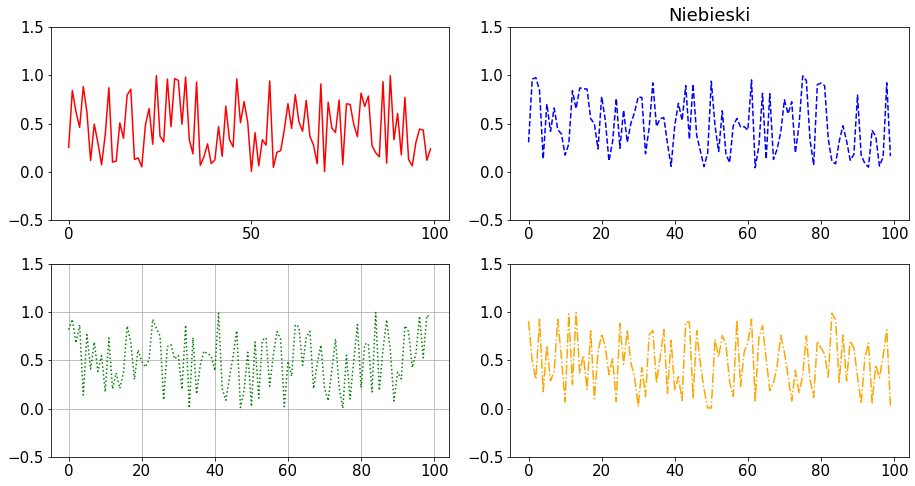

In [3]:
fig, axes = plt.subplots(2, 2)
colors = ["red", "blue", "green", "orange"]
linestyles = ["-", "--", ":", "-."]

for index, ax in enumerate(axes.ravel()):
    xs = np.arange(100)
    ys = np.random.rand(100)
    ax.plot(xs, ys, color=colors[index], linestyle=linestyles[index])
    ax.set_ylim([-0.5, 1.5])

axes[0, 0].set_xticks([0, 50, 100])
axes[0, 1].set_title("Niebieski")
axes[1, 0].grid()
fig.tight_layout()

# Basic animations with `Celluloid`

---

In [4]:
def x(t, k=3):
    return np.cos(k*t)

def y(t, k=2):
    return np.sin(k*t)

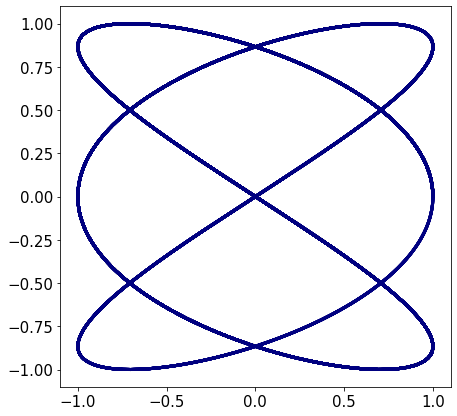

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ts = np.linspace(0, 2*np.pi + 0.5, 1000)

frames = 100
camera = Camera(fig)

for i in range(frames):
    ax.plot(x(ts[:i*10]), y(ts[:i*10]), lw=3, color="navy")
    camera.snap()

In [6]:
animation = camera.animate(blit=True, interval=30)

In [7]:
HTML(animation.to_jshtml())

In [8]:
animation.save('lissajous.mp4', dpi=100)  # ........ conda install ffmpeg

# `Seaborn` - working with dataframes

---

https://seaborn.pydata.org/examples/index.html

In [9]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [10]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

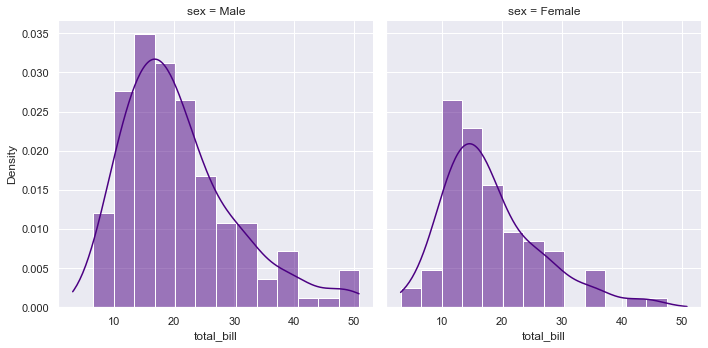

In [11]:
sns.set_context("notebook")
sns.set_style("darkgrid")

sns.displot(data=tips, x="total_bill", kde=True, stat="density", col="sex", color="indigo")

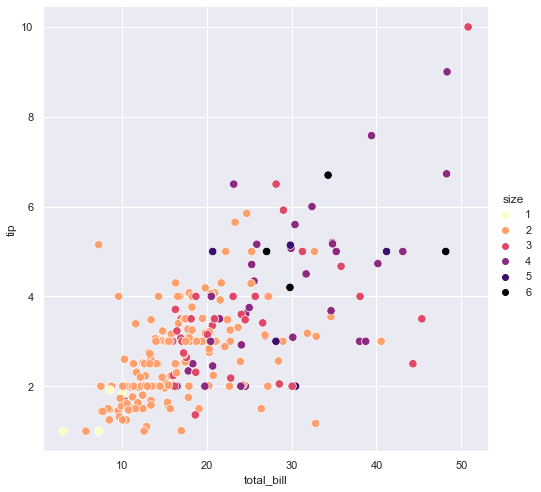

In [13]:
# sns.scatterplot(data=df, x="total_bill", y="tip")
# sns.lineplot(data=df, x="total_bill", y="tip")

sns.relplot(data=tips, x="total_bill", y="tip", 
            kind="scatter", 
            hue="size", 
            palette="magma_r", 
            height=7, s=70, 
            marker="o");

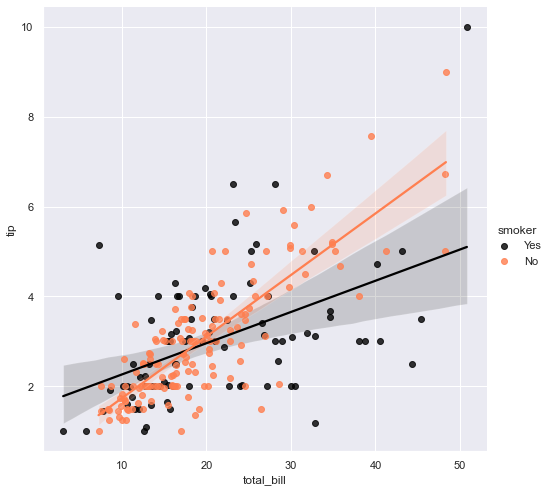

In [14]:
sns.lmplot(data=tips, x="total_bill", y="tip",  
            hue="smoker", 
            palette=["black", "coral"], 
            height=7);

Text(0.5, 1.0, 'Boxploty')

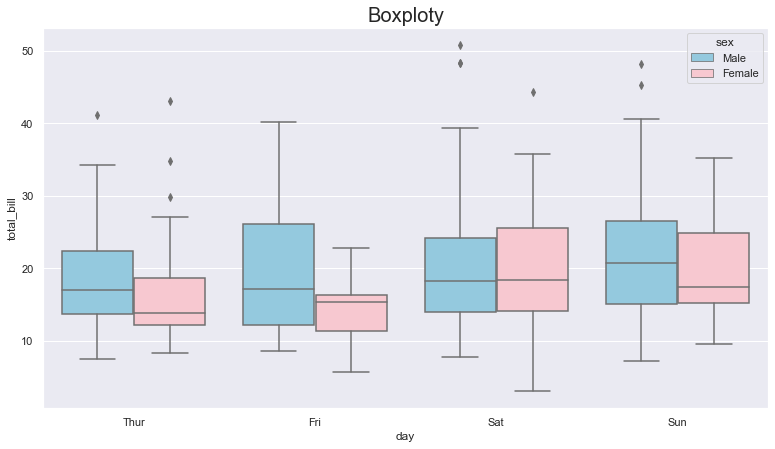

In [15]:
sns.boxplot(data=tips, x="day", y="total_bill", 
            palette=["skyblue", "pink"], 
            hue="sex")

plt.title("Boxploty", fontsize=20)

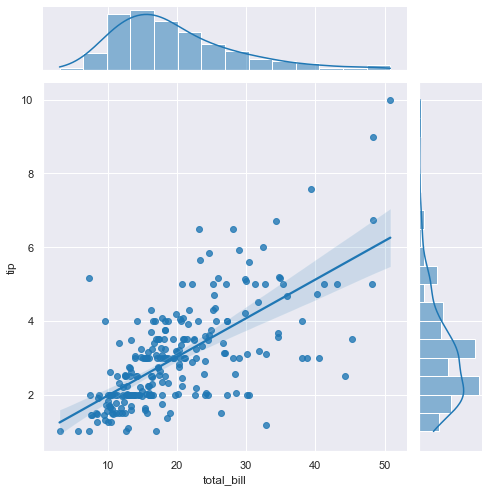

In [16]:
sns.jointplot(data=tips, x="total_bill", y="tip", height=7, kind="reg")

# Interactive plots with `plotly`

---

🔵 https://plotly.com/python/

🔵 https://www.statworx.com/en/content-hub/blog/plotly-an-interactive-charting-library/

<img src="./media/plotly-structure.png" width = 700></img>

In [32]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
print(fig)
fig

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([1, 3, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


In [33]:
fig = go.Figure(
    data=[go.Bar(x=["a", "b", "c"], y=[1, 3, 2])],
    layout=dict(title=dict(text="A Figure Specified By A Graph Object"))
)

fig.update_layout({"xaxis_title": "x"})

print(fig)
fig

Figure({
    'data': [{'type': 'bar', 'x': ['a', 'b', 'c'], 'y': [1, 3, 2]}],
    'layout': {'template': '...',
               'title': {'text': 'A Figure Specified By A Graph Object'},
               'xaxis': {'title': {'text': 'x'}}}
})


In [19]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

In [20]:
df = px.data.gapminder()
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [37]:
px.scatter(df, x="gdpPercap", y="lifeExp", 
           animation_frame="year", 
           animation_group="country",
           size="pop", 
           color="continent", 
           log_x=True, 
           size_max=55, 
           range_x=[100,1e5], 
           range_y=[25,90])